In [1]:
# Import the dependencies
import numpy as np
np.random.seed(0)
import pandas as pd
from sklearn import datasets

### Build the Dataset

In [2]:
# Create a simulated dataset for illustration.
X, y = datasets.make_moons(n_samples=(500), noise=0.05, random_state=1)
X[0:10]

array([[ 0.26990344, -0.08961617],
       [ 0.65960878, -0.44401893],
       [ 0.85049952,  0.56270289],
       [ 0.60950684,  0.69134729],
       [ 2.00353027,  0.19446353],
       [ 1.98790193,  0.40053406],
       [ 0.24847592, -0.18050231],
       [ 0.94871933,  0.37843451],
       [-0.96065183, -0.10227327],
       [ 0.44418573,  0.90246804]])

### Fit and predict a K-Means Model

In [14]:
# Import the alternative algorithms for clustering.
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
# Use the Kmeans algorithm.
k_model = KMeans(n_clusters=2, n_init='auto', random_state=0)
k_model.fit(X)
predictions = k_model.predict(X)

<Axes: xlabel='feature_0', ylabel='feature_1'>

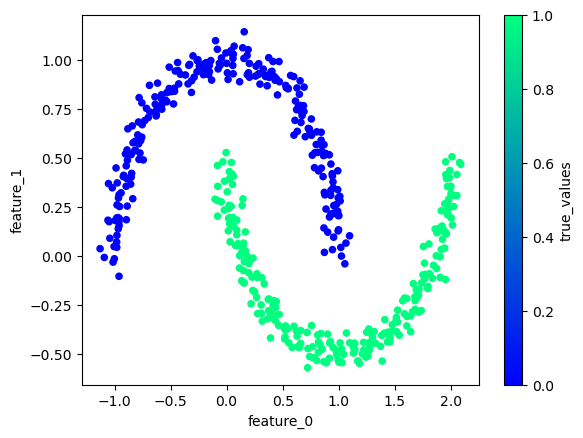

In [15]:
predictions_df = pd.DataFrame(X)
predictions_df['kmeans_labels'] = predictions
predictions_df['true_values'] = y
predictions_df.rename({0:"feature_0", 1:"feature_1"}, axis=1, inplace=True)

predictions_df.plot(kind='scatter', x='feature_0', y="feature_1", c='true_values', colormap='winter')

<Axes: xlabel='feature_0', ylabel='feature_1'>

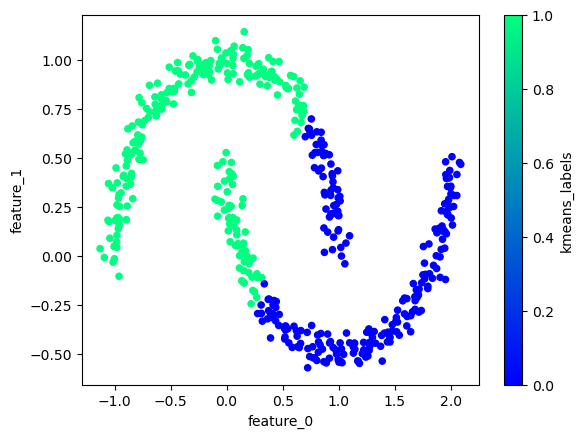

In [16]:
predictions_df.plot(kind='scatter', x='feature_0', y="feature_1", c='kmeans_labels', colormap='winter')

### Fit and Predict Birch and Agglomerative models

<Axes: xlabel='feature_0', ylabel='feature_1'>

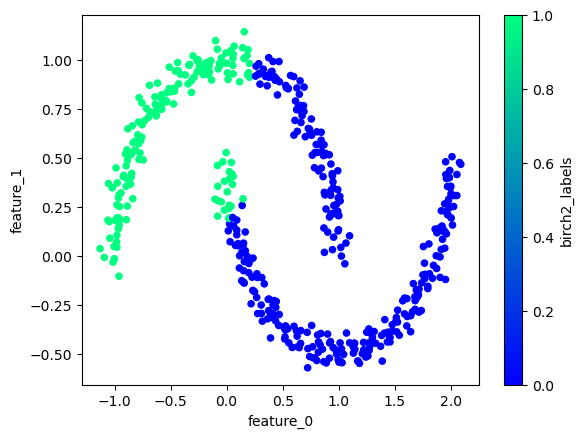

In [18]:
# Use the Birch algorithm.
birch_model = Birch(n_clusters=2)
birch_model.fit(X)
birch_predictions = birch_model.predict(X)

predictions_df['birch2_labels'] = birch_predictions
predictions_df.plot(kind='scatter', x='feature_0', y="feature_1", c='birch2_labels', colormap='winter')

<Axes: xlabel='feature_0', ylabel='feature_1'>

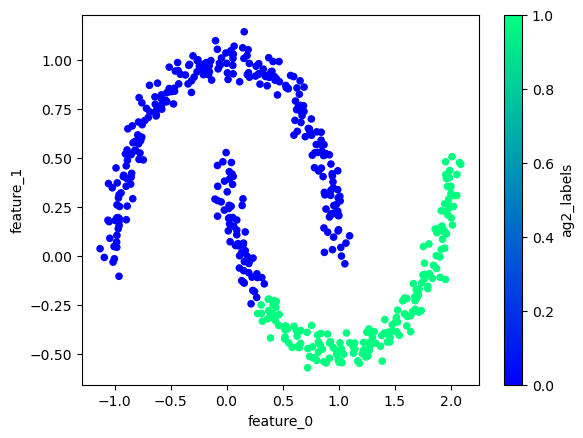

In [20]:
# Use the AgglomerativeClustering algorithm.
ag_model = AgglomerativeClustering(n_clusters=2)
ag_predictions = ag_model.fit_predict(X)

predictions_df['ag2_labels'] = ag_predictions

predictions_df.plot(kind='scatter', x='feature_0', y="feature_1", c='ag2_labels', colormap='winter')

### Plot Model Predictions for Birch

In [6]:
# Make predictions for the Birch algorithm. 


,0,1,birch-labels
0,0.269903,-0.089616,0
1,0.659609,-0.444019,0
2,0.850500,0.562703,0
3,0.609507,0.691347,0
4,2.003530,0.194464,0
...,...,...,...
495,0.024589,0.392571,1
496,0.673013,0.715418,0
497,1.277861,-0.457502,0
498,-0.980544,0.194562,1


In [7]:
#  Rename the non-string columns 0 and 1, "No" and "Yes" to avoid the Holoviews warning for future versions. 


,feature_0,feature_1,birch-labels
0,0.269903,-0.089616,0
1,0.659609,-0.444019,0
2,0.850500,0.562703,0
3,0.609507,0.691347,0
4,2.003530,0.194464,0
...,...,...,...
495,0.024589,0.392571,1
496,0.673013,0.715418,0
497,1.277861,-0.457502,0
498,-0.980544,0.194562,1


<Axes: xlabel='feature_0', ylabel='feature_1'>

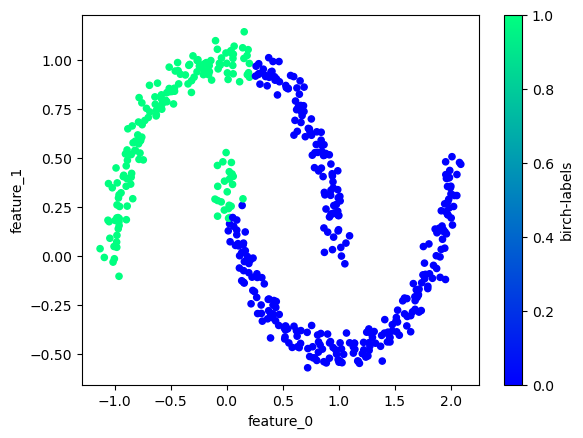

In [8]:
# Plot the clusters


### Estimate Scores for two Versions of the Birch Model

In [10]:
# Estimate scores for 3 clusters for the Birch model. 
# BCV/WCV (well-spread clusters/compactness within clusters)

In [22]:
# Use the Calinski-Harabasz index or variance ratio criterion to define two clusters. 
from sklearn import metrics
metrics.calinski_harabasz_score(X, birch_model.labels_)

588.1123857523019

In [23]:
# Use the Calinski-Harabasz index or variance ratio criterion to define three clusters. 
metrics.calinski_harabasz_score(X, k_model.labels_)

737.1963282161904